# Analyzing Chicago’s Taxi Dynamics
## Overview and Setup
Chicago’s vibrant urban environment and extensive transportation network offer a unique opportunity to explore the dynamics of taxi ride services. This project investigates the operational performance of taxi companies, analyzes drop-off patterns across different neighborhoods, and examines the impact of weather on ride durations from the Loop to O’Hare International Airport. Understanding these factors can provide actionable insights for both transportation planners and taxi service providers.
### Objectives
#### Exploratory Data Analysis: 
To evaluate and visualize data from two distinct CSV datasets—one detailing taxi companies and their ride volumes over a two-day period, and the other summarizing average drop-offs by Chicago neighborhood during November 2017.
#### Hypothesis Testing: 
To assess whether the average duration of rides from the Loop to O’Hare International Airport changes on rainy Saturdays. This involves formulating statistical hypotheses and performing a two-sample t-test to determine if weather conditions significantly affect ride durations.
### Plan and Strategy
#### Data Preparation and Exploration
(1) Import the CSV datasets using Python’s pandas library.

(2) Inspect data types and verify data integrity.

(3) Identify key trends through visualizations such as bar charts for taxi company ride volumes and neighborhood drop-off averages.
#### Statistical Hypothesis Testing
(1) Filter the airport rides data to isolate rides on Saturdays.

(2) Further segment the data based on weather conditions (rainy vs. non‑rainy).

(3) Formulate and test the hypothesis: “The average duration of rides from the Loop to O’Hare International Airport changes on rainy Saturdays.”

(4) Apply a two-sample t-test to compare ride durations between the two groups, with an appropriate significance level (α = 0.05).
#### Conclusion
(1) Synthesize findings from exploratory analysis and hypothesis testing.

(2) Discuss potential factors influencing ride patterns, such as urban layout, weather impact, and company performance.

(3) Offer insights and recommendations for stakeholders based on the analytical outcomes.

## Load Data

In [1]:
# Imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# Create dfs
airport = pd.read_csv('/datasets/project_sql_result_07.csv')
company = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')
print(airport.info())
print(company.info())
print(dropoff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   ave

In [3]:
# drop duplicates
airport = airport.drop_duplicates()
company = company.drop_duplicates()
dropoff = dropoff.drop_duplicates()
print(airport.info())
print(company.info())
print(dropoff.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            871 non-null    object 
 1   weather_conditions  871 non-null    object 
 2   duration_seconds    871 non-null    float64
dtypes: float64(1), object(2)
memory usage: 27.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   aver

In [4]:
airport.sample(5)

,start_ts,weather_conditions,duration_seconds
33,2017-11-04 12:00:00,Good,2580.0
195,2017-11-11 07:00:00,Good,1140.0
619,2017-11-25 14:00:00,Good,6420.0
1042,2017-11-11 05:00:00,Good,1380.0
222,2017-11-04 10:00:00,Good,2479.0


In [5]:
company.sample(5)

,company_name,trips_amount
22,Chicago Independents,1296
51,4623 - 27290 Jay Kim,15
49,5074 - 54002 Ahzmi Inc,16
46,3620 - 52292 David K. Cab Corp.,21
17,Chicago Medallion Management,1955


In [6]:
dropoff.sample(5)

,dropoff_location_name,average_trips
5,Lake View,2420.966667
48,Austin,44.433333
22,Lincoln Square,356.733333
54,North Lawndale,32.166667
77,Archer Heights,8.366667


In [7]:
# to datetime
airport['start_ts'] = pd.to_datetime(airport['start_ts'])
airport.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB


### Summary:
In the airport rides data, there are three columns: "start_ts," "weather_conditions," and "duration_seconds." Although all entries are non-null, the "start_ts" column is currently stored as an object; needs to be converted to datetime for time-based analyses. The company dataset contains "company_name" and "trips_amount," with no missing values, and the column names appear to be self-explanatory. The dropoff dataset includes "dropoff_location_name" and "average_trips," and it too shows no missing values. Overall, the data types are generally appropriate, but a conversion of the "start_ts" column to datetime would optimize the airport dataset for further time-series analysis.

## EDA

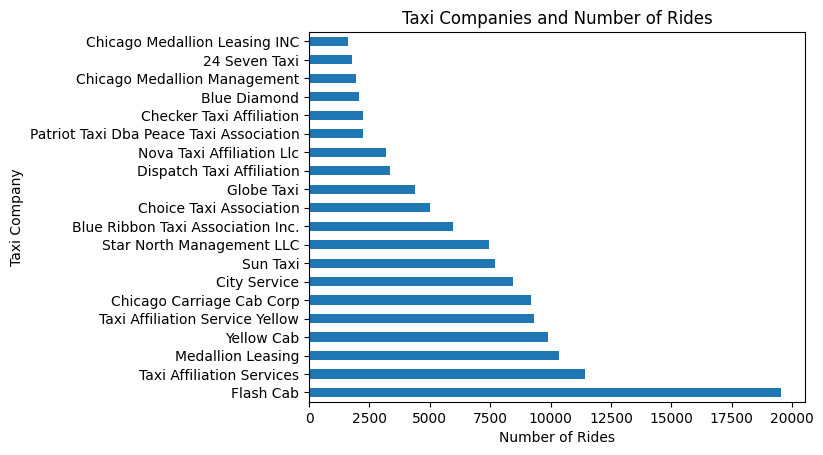

In [8]:
# Taxi Companies and Number of Rides
top20_companies = company.sort_values(by='trips_amount', ascending=False).head(20)

top20_companies.plot(
    x='company_name',
    y='trips_amount',
    kind='barh',
    title='Taxi Companies and Number of Rides',
    legend=False
)
plt.ylabel('Taxi Company')
plt.xlabel('Number of Rides')
plt.show()

### Summary:
Based on the sorted data, Flash Cab leads the market with 19,558 trips, followed by Taxi Affiliation Services and Medallion Leasing, indicating that the largest companies have a significant share of the total rides. This distribution suggests that market dominance in the taxi industry is closely linked to brand presence, network coverage, and operational efficiency. Larger companies, often supported by extensive fleets and robust logistical infrastructures, are likely to benefit from economies of scale and customer trust. In contrast, smaller operators like 303 Taxi and 5 Star Taxi, with lower trip counts, may be targeting niche markets or local neighborhoods. For business stakeholders, these insights highlight the competitive advantages of scale and integrated services, emphasizing the importance of strategic investments in fleet expansion and customer service improvements to capture a larger market share in a highly competitive urban transportation landscape.

In [9]:
# Top 10 neighborhoods
top10_neighborhoods = dropoff.sort_values(by='average_trips', ascending=False).head(10)
top10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


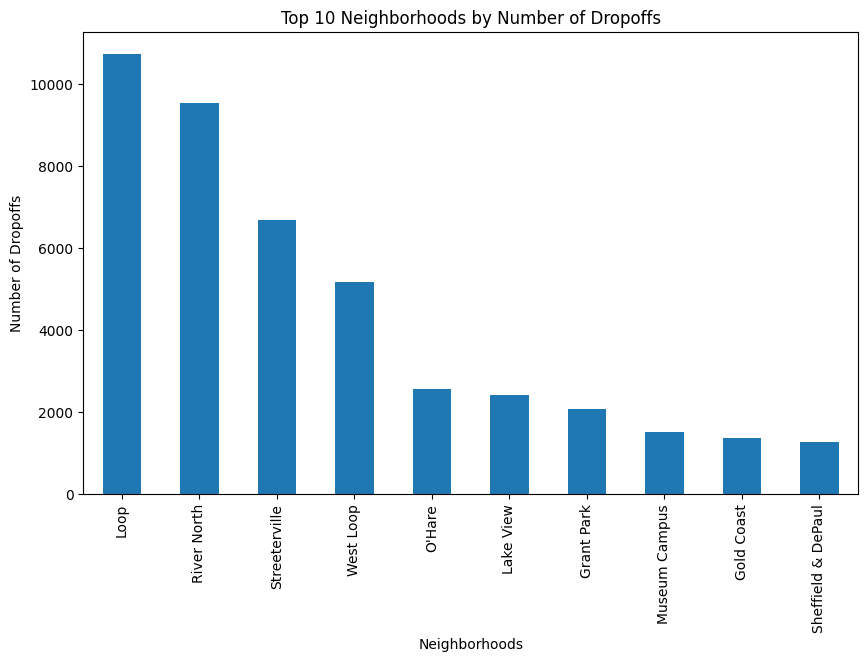

In [10]:
# plot
top10_neighborhoods.plot(
    x='dropoff_location_name',
    y='average_trips',
    kind='bar',
    title='Top 10 Neighborhoods by Number of Dropoffs',
    xlabel='Neighborhoods',
    ylabel='Number of Dropoffs',
    figsize=(10, 6), legend=False
)
plt.show()

### Summary:
The top 10 neighborhoods by average drop-offs reveal key areas of high taxi demand in Chicago. The Loop leads significantly, reflecting its role as a central business and transit hub, followed by River North and Streeterville, which attract a mix of residents, professionals, and tourists. Other neighborhoods such as West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield & DePaul highlight diverse market segments, from urban development to leisure and tourism. These insights emphasize the potential for targeted investments in robust taxi services in these high-demand areas.

## Hypothesis Testing
H0: The average duration of rides from the Loop to O'Hare International Airport are equal on rainy Saturdays.

H1: The average duration of rides from the Loop to O'Hare International Airport are different on rainy Saturdays.

In [12]:
# Test Hypothesis
# add day of week column
airport['day_of_week'] = airport['start_ts'].dt.day_name()
airport.sample(5)

,start_ts,weather_conditions,duration_seconds,day_of_week
92,2017-11-18 07:00:00,Bad,1511.0,Saturday
182,2017-11-11 11:00:00,Good,2054.0,Saturday
580,2017-11-04 13:00:00,Good,3420.0,Saturday
87,2017-11-18 05:00:00,Good,2075.0,Saturday
605,2017-11-04 15:00:00,Good,3420.0,Saturday


In [13]:
# Saturday df
saturday = airport[airport['day_of_week'] == 'Saturday']
saturday

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
...,...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0,Saturday
1061,2017-11-18 16:00:00,Bad,2186.0,Saturday
1063,2017-11-25 11:00:00,Good,0.0,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,Saturday


In [14]:
# Split
bad = saturday[saturday['weather_conditions'] == 'Bad']
good = saturday[saturday['weather_conditions'] == 'Good']
print("Bad Weather Days:", len(bad))
print("Good Weather Days:", len(good))

Bad Weather Days: 148
Good Weather Days: 723


In [15]:
# Variance
bad_var = bad['duration_seconds'].var()
good_var = good['duration_seconds'].var()
print("Bad Weather Duration Variance:", bad_var)
print("Good Weather Duration Variance:", good_var)

Bad Weather Duration Variance: 564819.443463872
Good Weather Duration Variance: 598216.951081022


### Alpha
The significance level, or alpha, of 0.05 is a widely accepted threshold in statistical hypothesis testing. This value implies that there is a 5% risk of concluding that a difference exists when, in fact, it does not. In many research fields, using an alpha of 0.05 strikes a balance between being too lenient and too strict.

In [16]:
# Test
alpha = 0.05

results = st.ttest_ind(bad['duration_seconds'], good['duration_seconds'])

print("pvalue:", results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print("We can't reject the null hypothesis.")

pvalue: 7.397770692813658e-08
We reject the null hypothesis.


### Summary:
This hypothesis test shows that the average ride durations from the Loop to O’Hare on rainy Saturdays are statistically different from those on good weather Saturdays (p-value = 7.4e-08, well below the 0.05 threshold). This result indicates that adverse weather conditions significantly affect ride times, which could be due to slower traffic, increased caution, or other operational challenges on rainy days. For business stakeholders, this finding underscores the importance of adjusting operational strategies during inclement weather such as optimizing driver scheduling, dynamic pricing, and resource allocation—to mitigate delays and maintain service quality. By anticipating longer ride durations on rainy Saturdays, taxi companies can better manage customer expectations and improve overall operational efficiency.

## Conclusions
The analysis of Chicago’s taxi data reveals three key strategic insights. First, market leadership is strongly linked to scale: Flash Cab leads with 19,558 trips, with Taxi Affiliation Services and Medallion Leasing following closely, indicating that larger companies with extensive fleets and robust logistical infrastructures benefit from economies of scale and high customer trust. Smaller operators, like 303 Taxi and 5 Star Taxi, appear to target niche or localized markets, suggesting that strategic investments in fleet expansion and customer service improvements are essential for capturing a larger market share. Second, our examination of neighborhood dropoffs shows that high demand areas such as The Loop, River North, and Streeterville present significant opportunities for targeted service enhancements, catering to a diverse mix of professionals, residents, and tourists. Finally, our hypothesis test comparing ride durations on rainy Saturdays indicates that adverse weather substantially impacts ride times, emphasizing the need for strategic adjustments in scheduling, pricing, and resource allocation during inclement weather to maintain service quality and manage customer expectations.